In [ ]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
import pandas as pd
from datetime import datetime
from pandas.tseries.offsets import *
from scipy import interpolate
import matplotlib.pyplot as plt
import locale

ImportError: cannot import name 'figsize' from 'matplotlib.pyplot' (c:\Users\vitor\AppData\Local\Programs\Python\Python313\Lib\site-packages\matplotlib\pyplot.py)

In [63]:
locale.setlocale(locale.LC_TIME, 'en_US.UTF-8')

'en_US.UTF-8'

In [44]:
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))

In [45]:
data_di = "08/04/2025"
mercadoria = 'DI1'

In [46]:
url = f"https://www2.bmf.com.br/pages/portal/bmfbovespa/boletim1/SistemaPregao1.asp?pagetype=pop&caminho=Resumo%20Estat%EDstico%20-%20Sistema%20Preg%E3o&Data={data_di}&Mercadoria={mercadoria}"

In [47]:
driver.get(url)

In [48]:
driver.implicitly_wait(3)
driver.maximize_window()

In [49]:
local_tabela = '/html/body/div/div[2]/form[1]/table[3]/tbody/tr[3]/td[3]/table'
local_indice = '/html/body/div/div[2]/form[1]/table[3]/tbody/tr[3]/td[1]/table'

In [50]:
elemento_tabela = driver.find_element("xpath", local_tabela)
elemento_indice = driver.find_element("xpath", local_indice)

In [51]:
html_tabela = elemento_tabela.get_attribute('outerHTML')
html_indice = elemento_indice.get_attribute('outerHTML')

In [52]:
tabela = pd.read_html(html_tabela)[0]
indice = pd.read_html(html_indice)[0]

C:\Users\vitor\AppData\Local\Temp\ipykernel_6056\186656632.py:1: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tabela = pd.read_html(html_tabela)[0]
C:\Users\vitor\AppData\Local\Temp\ipykernel_6056\186656632.py:2: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  indice = pd.read_html(html_indice)[0]


In [53]:
driver.quit()

In [54]:
tabela.columns = tabela.loc[0]
tabela = tabela['ÚLT. PREÇO']

In [55]:
indice.columns = indice.loc[0]
indice = indice.drop(0, axis=0)

In [56]:
tabela = tabela.drop (0, axis=0)

In [57]:
tabela.index = indice['VENCTO']

In [58]:
tabela = tabela.astype(int)/1000

In [59]:
tabela = tabela[tabela != 0]

In [60]:
legenda = pd.Series(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], 
                    index = ['F', 'G', 'H', 'J', 'K', 'M', 'N', 'Q', 'U', 'V', 'X', 'Z'])

In [65]:
lista_datas = []

for indice in tabela.index:
    
    letra = indice[0]
    mes = legenda[letra]
    ano = indice[1:3]

    data = f"{mes}-{ano}"
    data = datetime.strptime(data, '%b-%y')

    lista_datas.append(data)

In [66]:
tabela.index = lista_datas

In [67]:
curva_dias_uteis = []
dia_atual = datetime(2025, 4, 9)

for dia in tabela.index:
    dias_uteis = len(pd.date_range(dia_atual, dia, freq=BDay())) # é possível inserir os feriados bancarios no brasil com a fonte da ANBIMA
    curva_dias_uteis.append(dias_uteis)

curva_dias_uteis

[17,
 38,
 60,
 83,
 104,
 126,
 148,
 169,
 192,
 213,
 233,
 256,
 321,
 387,
 453,
 517,
 582,
 648,
 713,
 778,
 843,
 908,
 974,
 1038,
 1103,
 1169,
 1235,
 1299,
 1364,
 1496,
 1757,
 2018,
 2278,
 2539]

In [68]:
taxas = tabela.values

taxas = list(taxas)

In [69]:
print(len(curva_dias_uteis))
print(len(taxas))

34
34


In [70]:
dias_uteis_hoje_ate_data_desejada = len(pd.date_range(dia_atual, datetime(2030,6,14), freq=BDay()))

dias_uteis_hoje_ate_data_desejada

1353

In [71]:
linear = interpolate.interp1d(curva_dias_uteis, taxas, kind = 'linear')
cubica = interpolate.interp1d(curva_dias_uteis, taxas, kind = 'cubic')

In [72]:
dias_novos = [dias_uteis_hoje_ate_data_desejada, 520, 385]

taxas_linear = list(linear(dias_novos))
taxas_cubica = list(cubica(dias_novos))

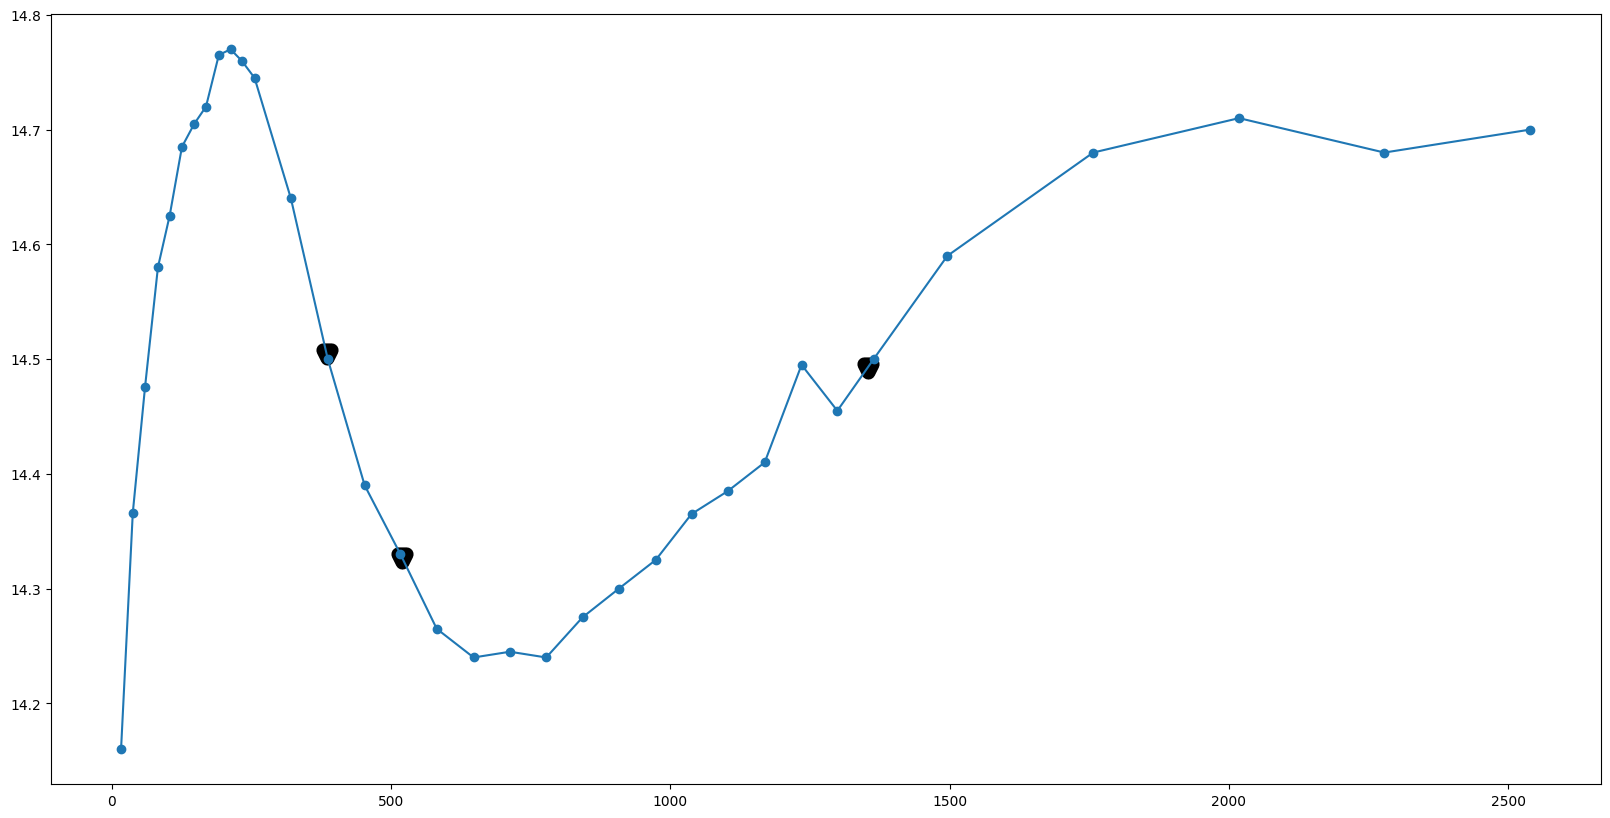

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))

ax.scatter(dias_novos, taxas_linear, marker='v', color='black', linewidths=10)
ax.plot(curva_dias_uteis, taxas, marker="o")

plt.show()